# 복습

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

os.chdir('/content/drive/MyDrive/새싹2기/python_DA/data')

In [4]:
# 데이터 불러오기
import pandas as pd

tips = pd.read_csv('tips.csv')


In [5]:
tips.shape

(244, 7)

In [6]:
tips.dtypes

,0
total_bill,float64
tip,float64
sex,object
smoker,object
day,object
time,object
size,int64


In [7]:
tips.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


In [8]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


<Axes: >

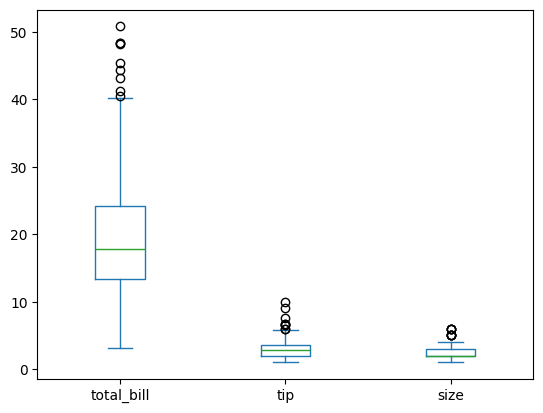

In [9]:
tips.plot.box()

In [10]:
tips['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [11]:
pd.Categorical(tips['day'],
               categories= ['Thur','Fri','Sat','Sun'])

['Sun', 'Sun', 'Sun', 'Sun', 'Sun', ..., 'Sat', 'Sat', 'Sat', 'Sat', 'Thur']
Length: 244
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [12]:
tips.dtypes

,0
total_bill,float64
tip,float64
sex,object
smoker,object
day,object
time,object
size,int64


In [13]:
tips.groupby('smoker')['total_bill'].mean()

,total_bill
smoker,
No,19.188278
Yes,20.756344


In [14]:
tips.groupby('tip')['total_bill'].mean()
# 그룹을tip으로 나누는 것이 의미가 없다...

,total_bill
tip,
1.00,7.167500
1.01,16.990000
1.10,12.900000
1.17,32.830000
1.25,9.696667
...,...
6.70,34.300000
6.73,48.270000
7.58,39.420000


In [15]:
# split만 하면, 우리는 직접 볼 수 없다.
tips.groupby(['sex','day'],observed=True)

In [16]:
tips.groupby(['sex','day'],observed=True)['total_bill'].mean()

sex     day 
Female  Fri     14.145556
        Sat     19.680357
        Sun     19.872222
        Thur    16.715312
Male    Fri     19.857000
        Sat     20.802542
        Sun     21.887241
        Thur    18.714667
Name: total_bill, dtype: float64

In [17]:
tips['sex'].nunique() * tips['day'].nunique()

8

In [19]:
tips.groupby(['smoker','day']).agg({'total_bill':'mean',
                                    'tip':'max',
                                    'time':'size'}).reset_index().round(2)

,smoker,day,total_bill,tip,time
0,No,Fri,18.42,3.50,4
1,No,Sat,19.66,9.00,45
2,No,Sun,20.51,6.00,57
3,No,Thur,17.11,6.70,45
4,Yes,Fri,16.81,4.73,15
5,Yes,Sat,21.28,10.00,42
6,Yes,Sun,24.12,6.50,19
7,Yes,Thur,19.19,5.00,17


In [20]:
# filter 함수
tips.groupby(['sex','day']).filter(lambda x: x['tip'].mean()>3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
236,12.60,1.00,Male,Yes,Sat,Dinner,2
237,32.83,1.17,Male,Yes,Sat,Dinner,2
239,29.03,5.92,Male,No,Sat,Dinner,3
241,22.67,2.00,Male,Yes,Sat,Dinner,2


In [23]:
# transform 함수
tips['total_bill_avg_by_smk'] = tips.groupby('smoker')['total_bill'].transform('mean')

In [24]:
tips

,total_bill,tip,sex,smoker,day,time,size,total_bill_avg_by_smk
0,16.99,1.01,Female,No,Sun,Dinner,2,19.188278
1,10.34,1.66,Male,No,Sun,Dinner,3,19.188278
2,21.01,3.50,Male,No,Sun,Dinner,3,19.188278
3,23.68,3.31,Male,No,Sun,Dinner,2,19.188278
4,24.59,3.61,Female,No,Sun,Dinner,4,19.188278
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,19.188278
240,27.18,2.00,Female,Yes,Sat,Dinner,2,20.756344
241,22.67,2.00,Male,Yes,Sat,Dinner,2,20.756344
242,17.82,1.75,Male,No,Sat,Dinner,2,19.188278


In [25]:
df = pd.DataFrame({'total_bill':[100, 40, 10, 50],
                   'tip':[20, 10, 1, 5],
                   'sex':['male','male','male','female'],
                   'day':['Sun','Mon','Mon','Tue']})

In [26]:
df

,total_bill,tip,sex,day
0,100,20,male,Sun
1,40,10,male,Mon
2,10,1,male,Mon
3,50,5,female,Tue


In [27]:
pd.concat([tips,df])

,total_bill,tip,sex,smoker,day,time,size,total_bill_avg_by_smk
0,16.99,1.01,Female,No,Sun,Dinner,2.0,19.188278
1,10.34,1.66,Male,No,Sun,Dinner,3.0,19.188278
2,21.01,3.50,Male,No,Sun,Dinner,3.0,19.188278
3,23.68,3.31,Male,No,Sun,Dinner,2.0,19.188278
4,24.59,3.61,Female,No,Sun,Dinner,4.0,19.188278
...,...,...,...,...,...,...,...,...
243,18.78,3.00,Female,No,Thur,Dinner,2.0,19.188278
0,100.00,20.00,male,NaN,Sun,NaN,NaN,NaN
1,40.00,10.00,male,NaN,Mon,NaN,NaN,NaN
2,10.00,1.00,male,NaN,Mon,NaN,NaN,NaN


In [29]:
df_day = pd.DataFrame({
    'day': ['Thur', 'Fri', 'Sat', 'Sun'],
    'promotion': ['No', 'Yes', 'Yes', 'No']
})
df_day

,day,promotion
0,Thur,No
1,Fri,Yes
2,Sat,Yes
3,Sun,No


In [34]:
tips_merge = pd.merge(tips,df_day, on= 'day', how='right')

In [36]:
tips_merge.groupby(['promotion','time'])[['total_bill','tip','size']].agg({'total_bill':'mean',
                                                                    'tip':'mean',
                                                                    'size':'size'}).round(2)

total_bill   tip  size
promotion time                          
No        Dinner       21.38  3.25    77
          Lunch        17.66  2.77    61
Yes       Dinner       20.35  2.99    99
          Lunch        12.85  2.38     7

In [37]:
tips.melt(id_vars=['sex','smoker','day','time'],
          value_vars=['total_bill','tip'],
          var_name='type',
          value_name= 'amount')

,sex,smoker,day,time,type,amount
0,Female,No,Sun,Dinner,total_bill,16.99
1,Male,No,Sun,Dinner,total_bill,10.34
2,Male,No,Sun,Dinner,total_bill,21.01
3,Male,No,Sun,Dinner,total_bill,23.68
4,Female,No,Sun,Dinner,total_bill,24.59
...,...,...,...,...,...,...
483,Male,No,Sat,Dinner,tip,5.92
484,Female,Yes,Sat,Dinner,tip,2.00
485,Male,Yes,Sat,Dinner,tip,2.00
486,Male,No,Sat,Dinner,tip,1.75


In [44]:
tips.pivot_table(index='sex',
                columns='day',
                values='tip',
                aggfunc='mean',
                observed=True).round(2).reset_index()

day,sex,Fri,Sat,Sun,Thur
0,Female,2.78,2.80,3.37,2.58
1,Male,2.69,3.08,3.22,2.98


In [45]:
tips.groupby(['sex','day'],observed=True)['tip'].mean().unstack()

day,Fri,Sat,Sun,Thur
sex,,,,
Female,2.781111,2.801786,3.367222,2.575625
Male,2.693000,3.083898,3.220345,2.980333


# [1] 시각화 - matplotlib

In [47]:
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 53.3 MB/s eta 0:00:00


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

## (1) Axes : 도화지 위의 실제 그래프
- 실제 데이터가 그려지는 영역

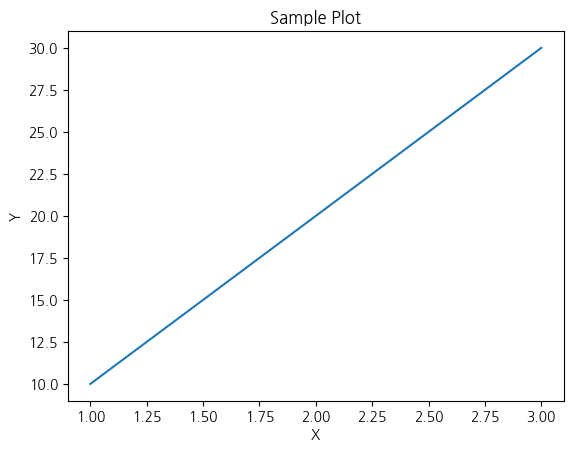

In [49]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot([1,2,3], [10,20,30])
ax.set_title("Sample Plot")
ax.set_xlabel("X")
ax.set_ylabel("Y")

plt.show()

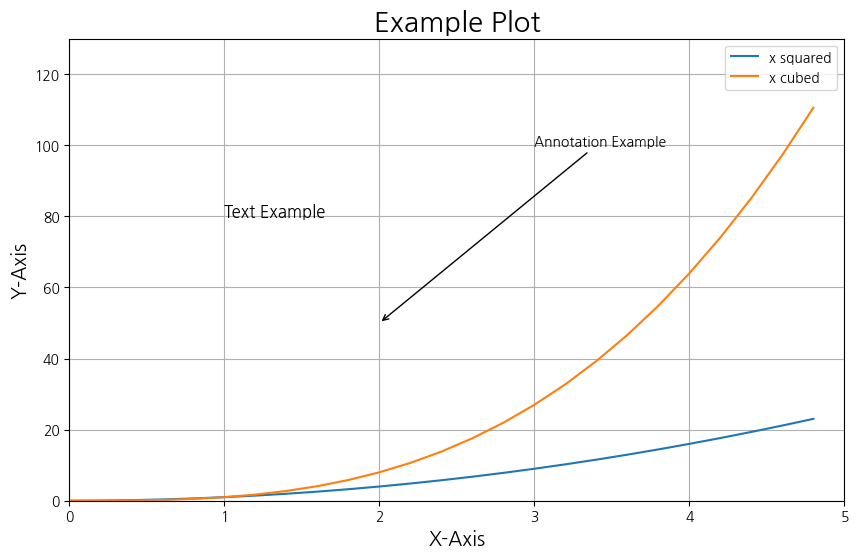

In [50]:
import numpy as np

x = np.arange(0, 5, 0.2)
y1 = x ** 2
y2 = x ** 3

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(x, y1, label='x squared')
ax.plot(x, y2, label='x cubed')

ax.set_title('Example Plot', fontsize=20)
ax.set_xlabel('X-Axis', fontsize=14)
ax.set_ylabel('Y-Axis', fontsize=14)

ax.set_xlim(0, 5)
ax.set_ylim(0, 130)

ax.set_xticks(np.arange(0, 6, 1))
ax.set_yticks(np.arange(0, 131, 20))

ax.grid(True)
ax.legend()

ax.text(1, 80, 'Text Example', fontsize=12)

ax.annotate(
    'Annotation Example',
    xy=(2, 50),
    xytext=(3, 100),
    arrowprops=dict(arrowstyle='->')
)

plt.show()


Text(0, 0.5, '요일')

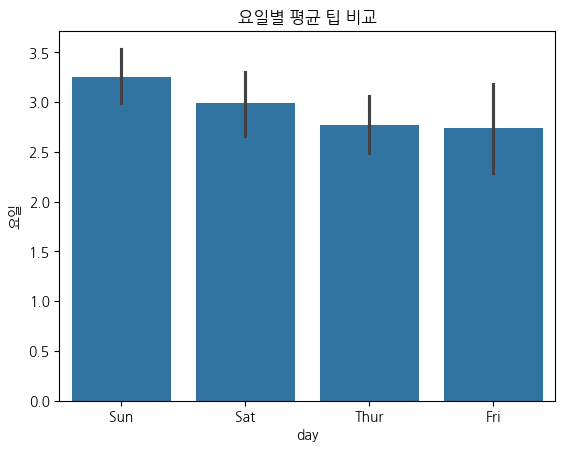

In [54]:
ax = sns.barplot(data=tips, x= 'day',y= 'tip')
ax.set_title('요일별 평균 팁 비교')
ax.set_ylabel('팁 (달러)')
ax.set_ylabel('요일')

# [2] 관계형 데이터

## (1) scatterplot

Text(0, 0.5, '팁 (달러)')

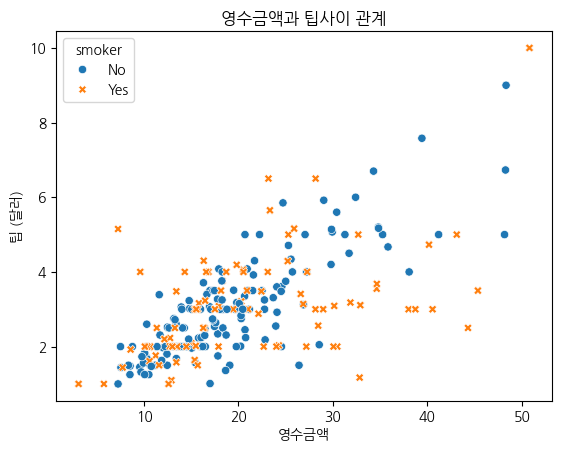

In [69]:
ax = sns.scatterplot(data=tips, x="total_bill", y="tip",
                     hue="smoker", style='smoker');
ax.set_title('영수금액과 팁사이 관계')
ax.set_xlabel('영수금액')
ax.set_ylabel('팁 (달러)')

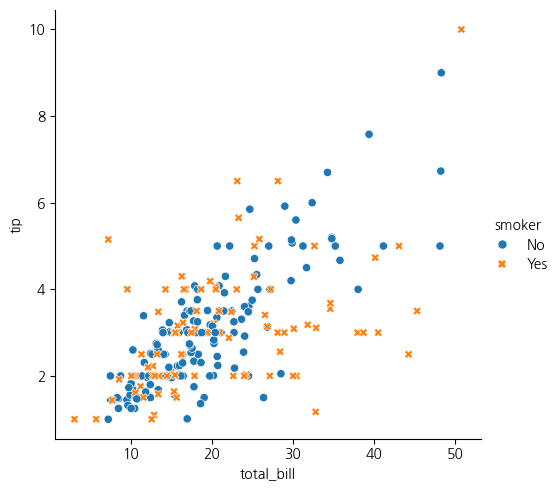

In [63]:
sns.relplot(data=tips, x="total_bill", y="tip", hue="smoker", style='smoker');

## (2) lineplot

In [70]:
fmri = sns.load_dataset('fmri')

In [71]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [72]:
fmri.dtypes

,0
subject,object
timepoint,int64
event,object
region,object
signal,float64


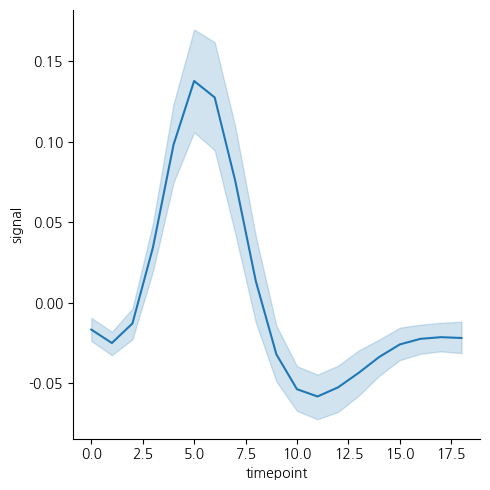

In [74]:
sns.relplot(data=fmri, kind='line',
            x='timepoint' , y='signal')

<Axes: xlabel='timepoint'>

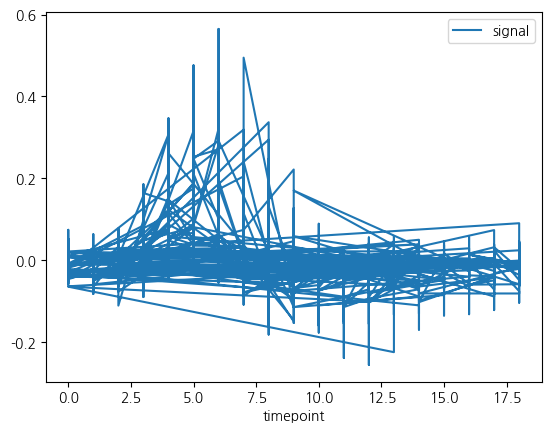

In [75]:
fmri.plot.line(x='timepoint',y='signal')

<Axes: xlabel='timepoint'>

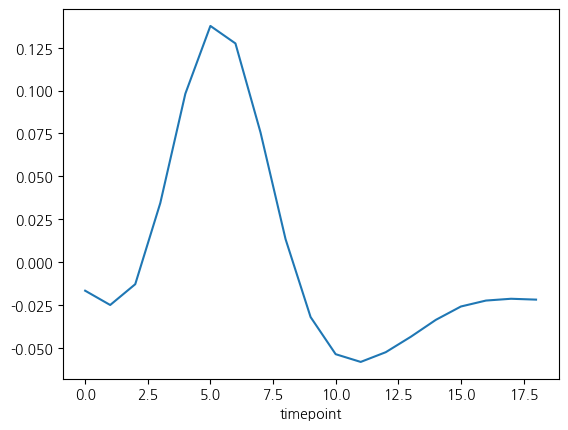

In [77]:
fmri.groupby('timepoint')['signal'].mean().plot.line()

<Axes: xlabel='timepoint'>

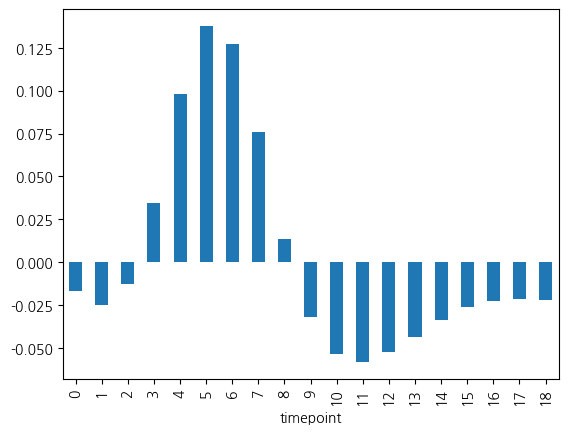

In [78]:
fmri.groupby('timepoint')['signal'].mean().plot.bar()

<Axes: xlabel='timepoint', ylabel='signal'>

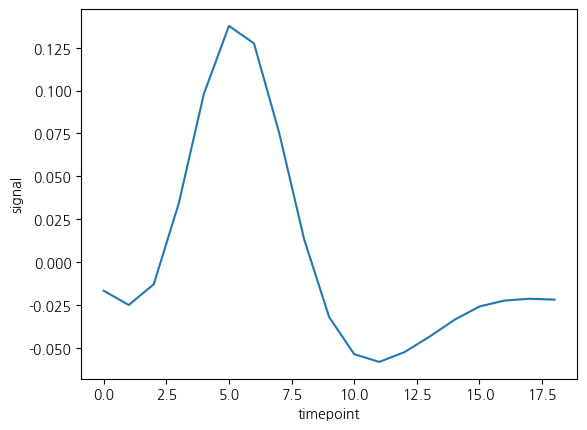

In [79]:
sns.lineplot(data=fmri,
            x='timepoint',y='signal',
            estimator='mean', # 여러개가 들어왔을 때, 추정하는 방법
            errorbar=None # 여러개가 들어 왔을 때, 그 면적도 보여줌
            )

## (3) 다중 시각화

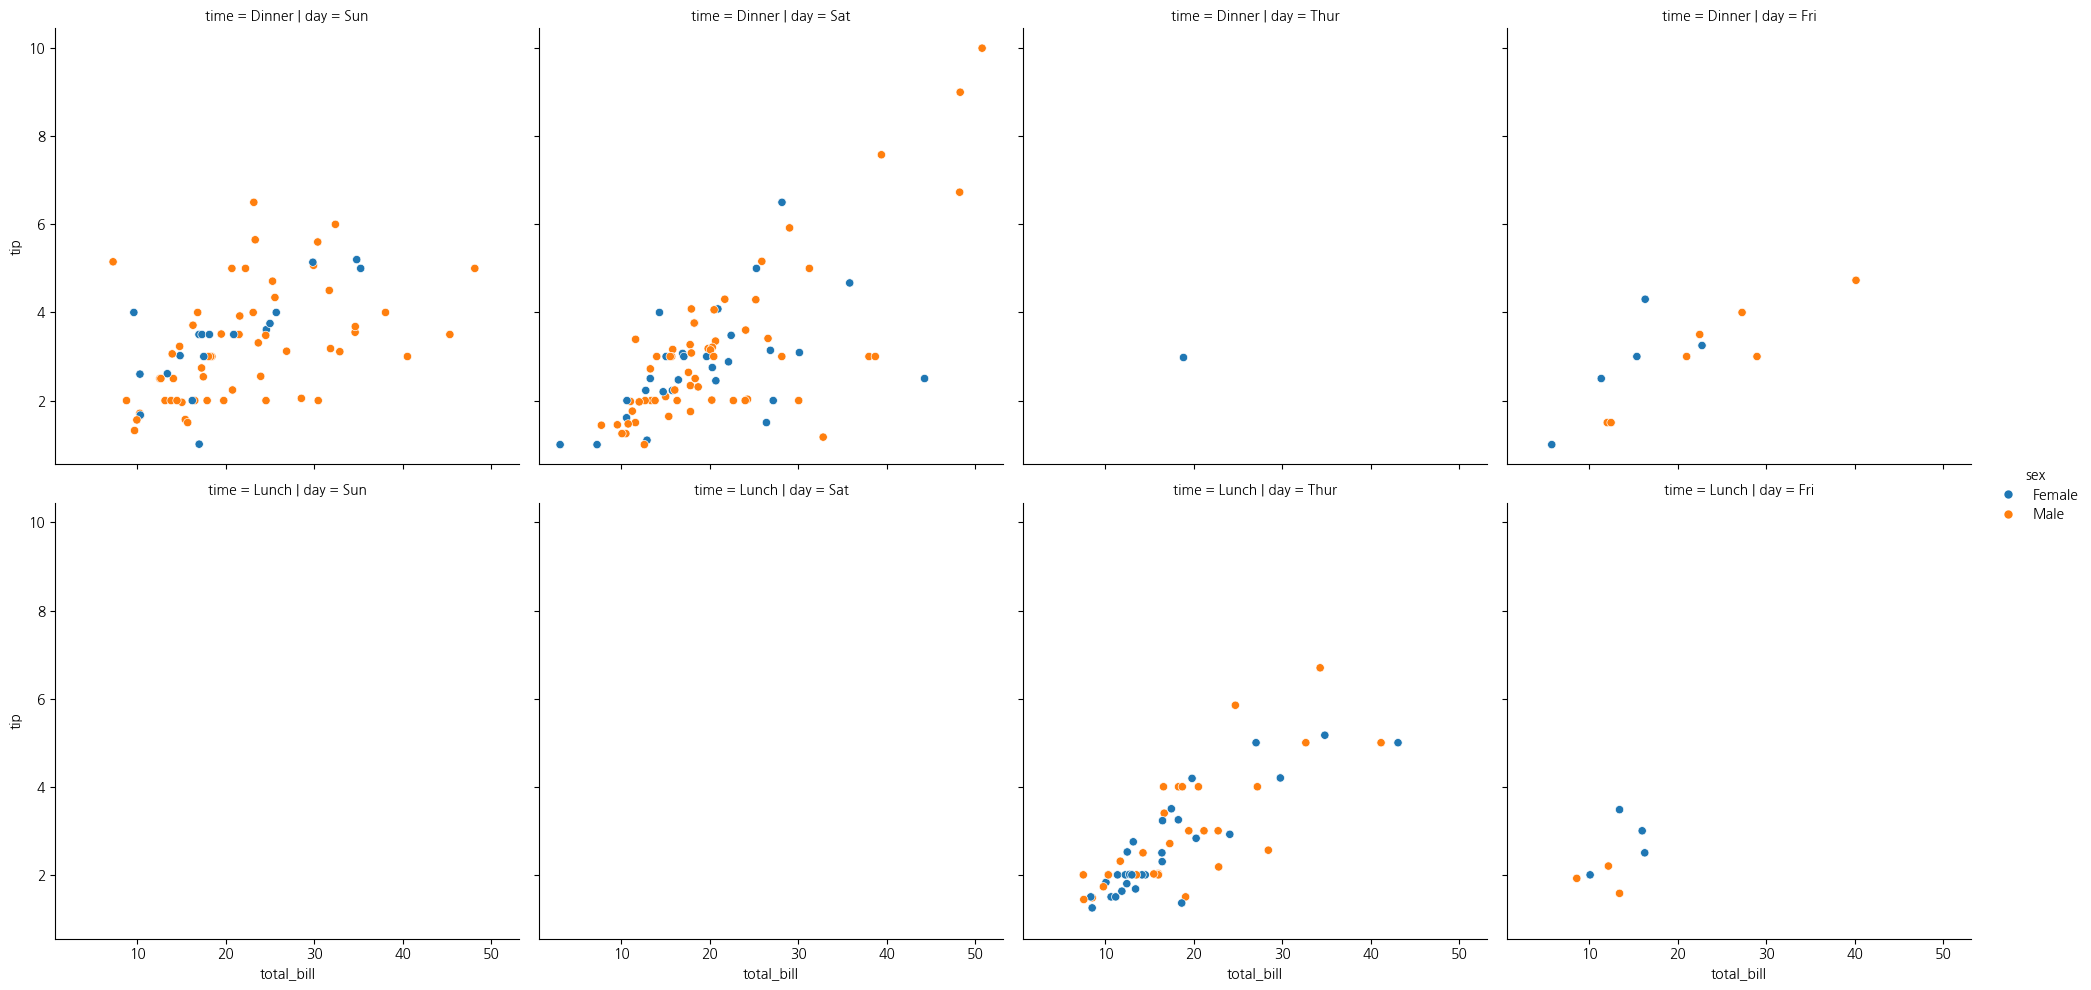

In [83]:
sns.relplot(data=tips, x='total_bill',y='tip',
            kind='scatter', hue = 'sex', col='day',row='time')

# 시각화 실습

In [85]:
titan = sns.load_dataset('titanic')
titan.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


나이(Age)와 요금(Fare)에 따른 생존 패턴을
두 변수의 관계를 중심으로 시각화해 보세요.
(생존 여부는 색상으로 구분합니다)

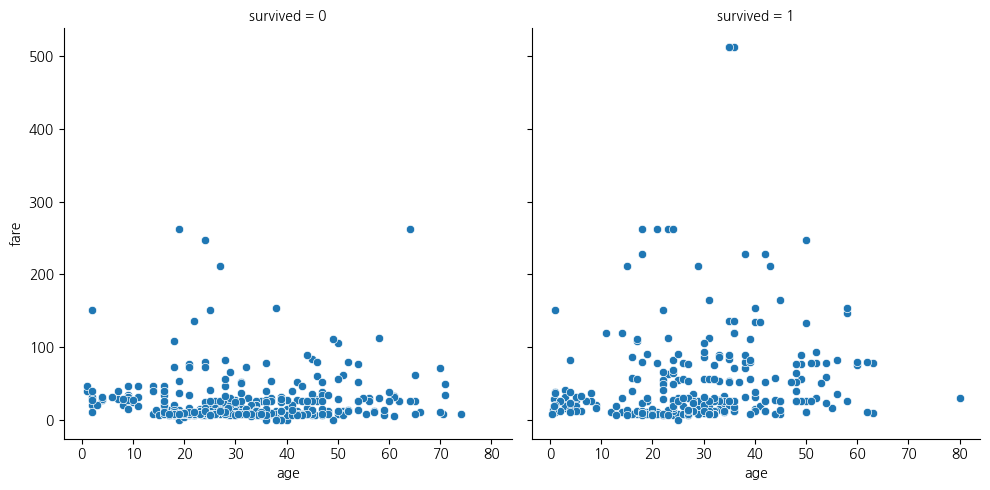

In [104]:
sns.relplot(data=titan, x='age', y='fare',
                 col='survived', kind='scatter');

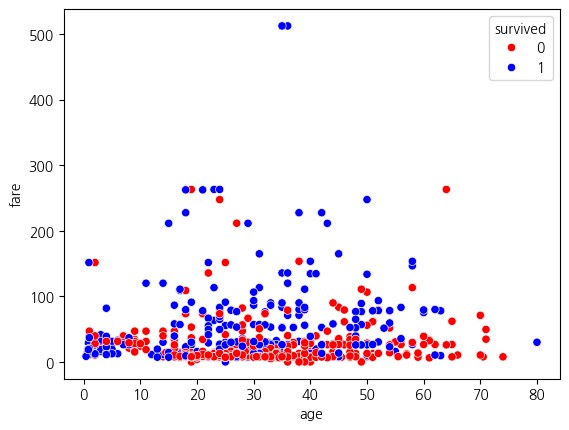

In [105]:
ax = sns.scatterplot(data=titan, x='age', y='fare', hue='survived', palette={0:'red', 1:'blue'});

성별(sex)에 따라 나이(age)–요금(fare) 관계가 생존 여부별로 어떻게 달라지는지 살펴보세요.

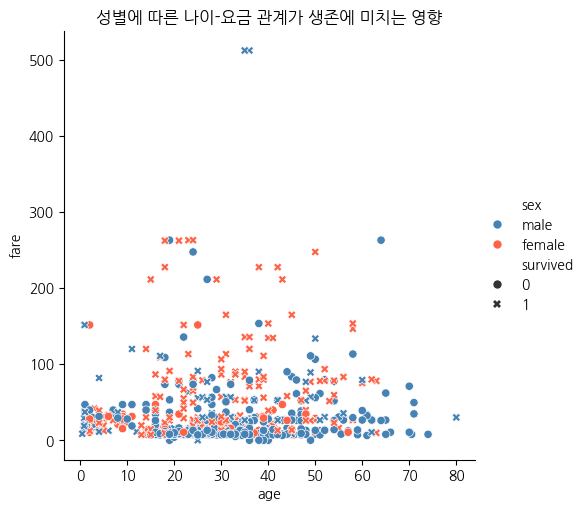

In [126]:
sns.relplot(x="age", y="fare", data=titan, style="survived", hue="sex",
            palette={'male': "steelblue", 'female': "tomato"})
plt.title("성별에 따른 나이-요금 관계가 생존에 미치는 영향")
plt.show()

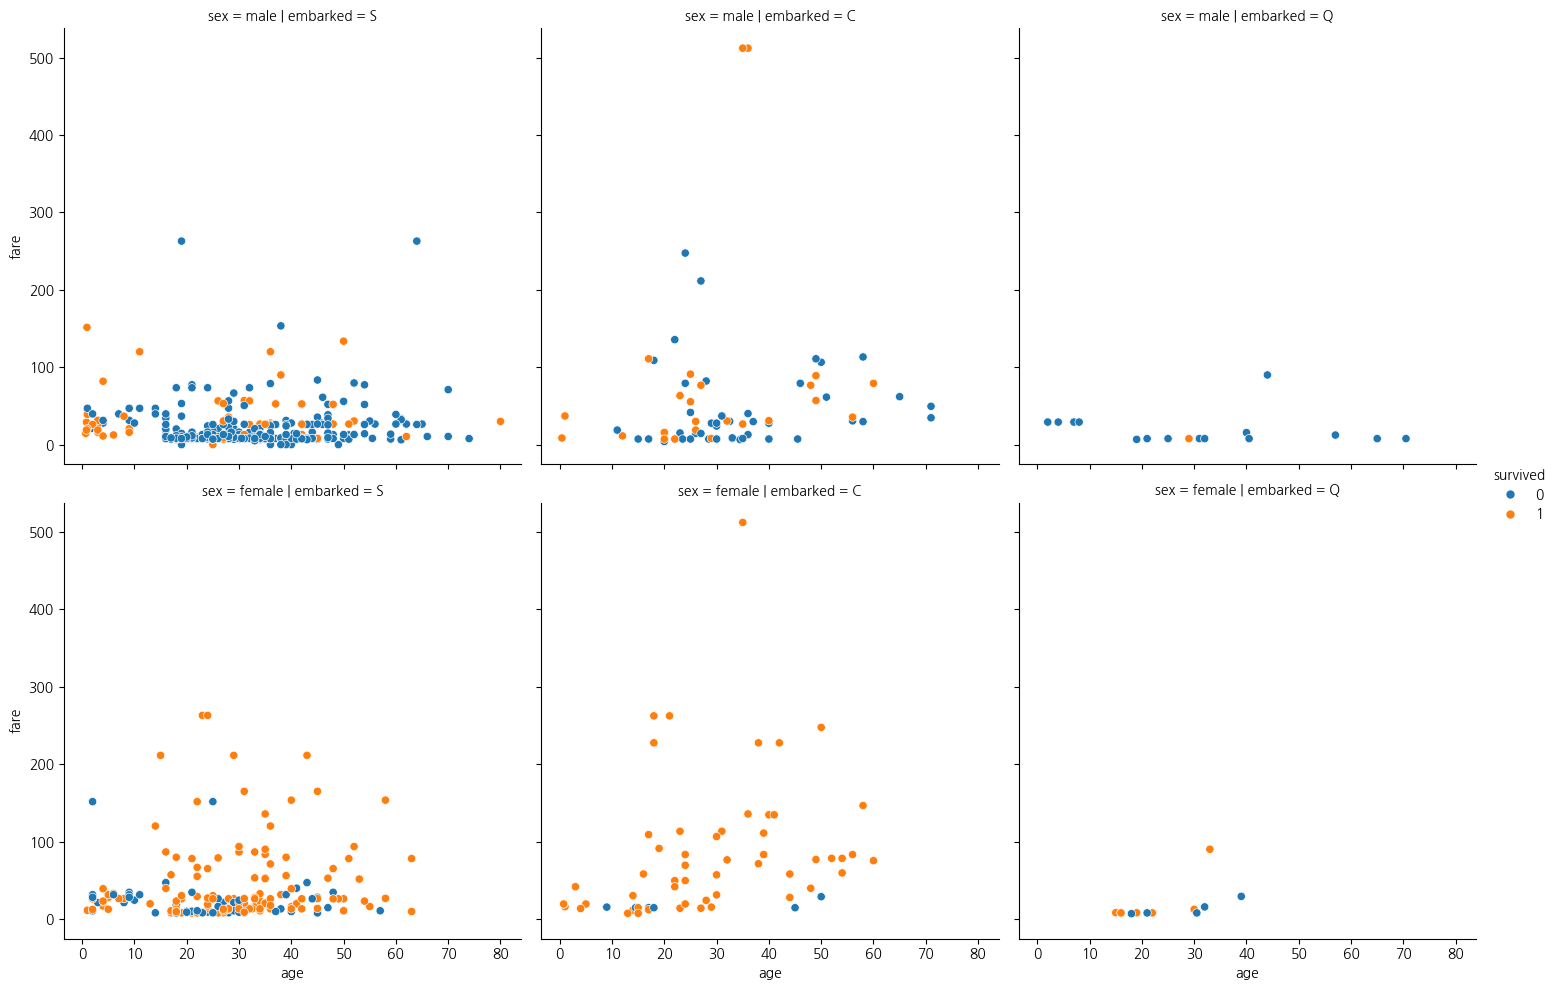

In [134]:
sns.relplot(
    data=titan,
    x='age',
    y='fare',
    hue='survived',
    col='embarked',
    row='sex',
    kind='scatter',
    height=5
)
plt.show()

# [3] 분포형 데이터

## (1) displot

In [137]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [139]:
penguins['species'].value_counts()

,count
species,
Adelie,152
Gentoo,124
Chinstrap,68


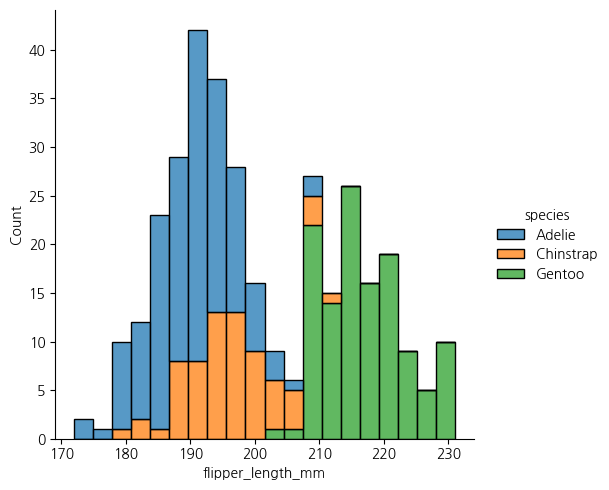

In [138]:
sns.displot(penguins, x="flipper_length_mm", hue="species", multiple="stack", bins=20)

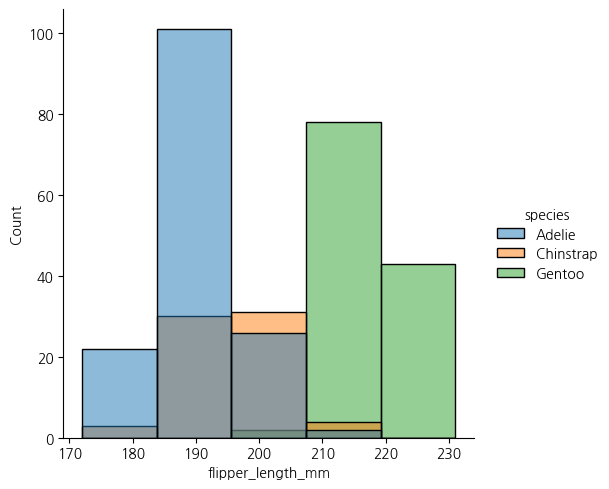

In [140]:
# bins가 너무 적음
sns.displot(data=penguins,kind='hist',x='flipper_length_mm',
            hue='species',bins=5)

In [141]:
penguins_ol = penguins.copy()

In [142]:
penguins_ol.loc[1,'bill_length_mm'] = 10000
penguins_ol.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,10000.0,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


<Axes: xlabel='bill_length_mm', ylabel='Count'>

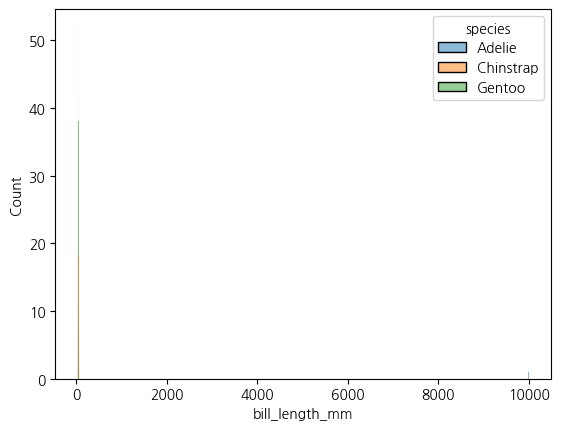

In [143]:
# 이상치가 있는 경우, 정확한 정보를 표현하지 못한다.
sns.histplot(data=penguins_ol, x='bill_length_mm', hue='species')

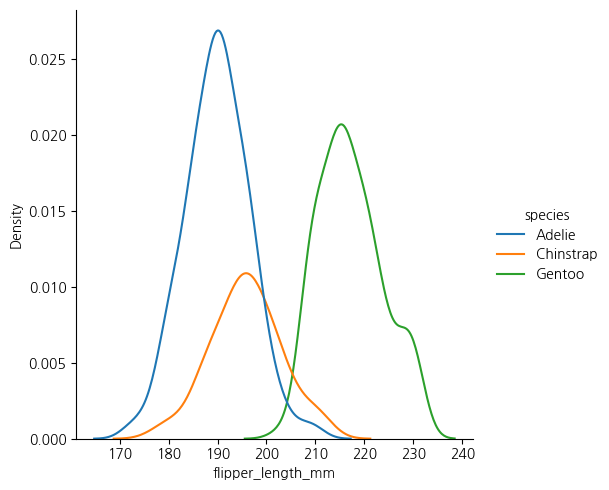

In [147]:
sns.displot(data=penguins, kind='kde', x='flipper_length_mm', hue='species')

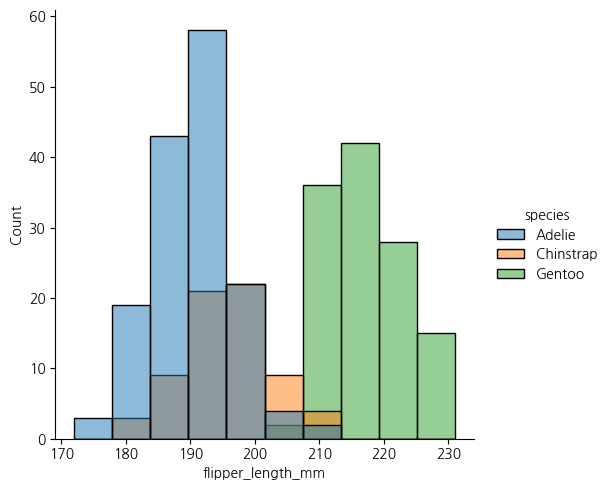

In [148]:
sns.displot(data=penguins, kind='hist', x='flipper_length_mm', hue='species')

<Axes: xlabel='flipper_length_mm'>

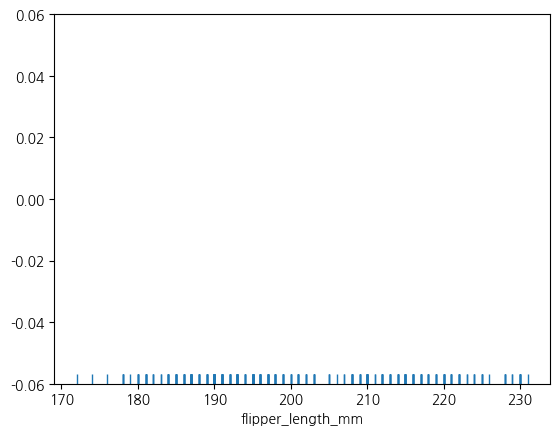

In [149]:
# rug plot
sns.rugplot(data=penguins, x='flipper_length_mm')

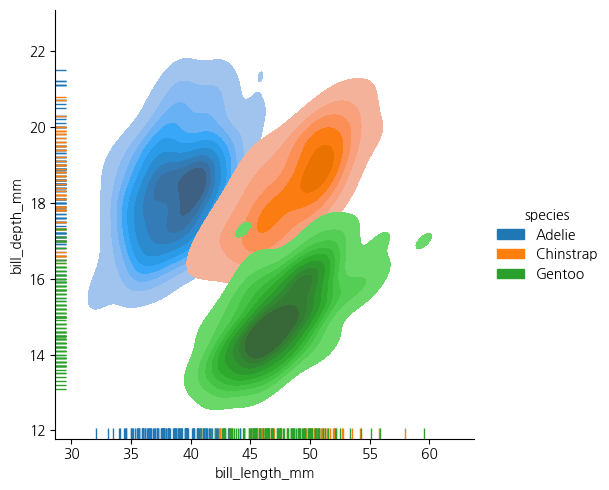

In [151]:
sns.displot(data=penguins, kind='kde', x='bill_length_mm', y='bill_depth_mm', rug=True, hue='species', fill=True)

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

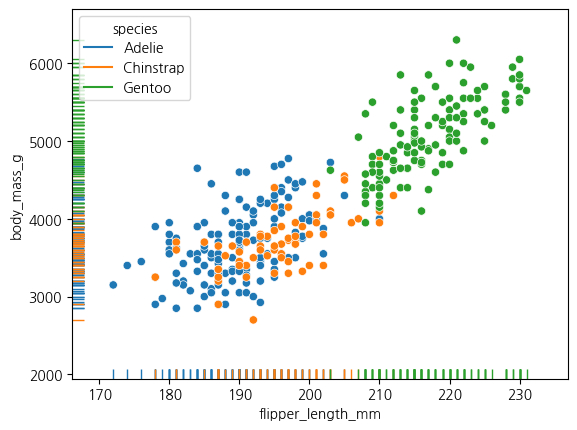

In [153]:
sns.scatterplot(data=penguins, x='flipper_length_mm', y='body_mass_g', hue='species')
sns.rugplot(data=penguins, x='flipper_length_mm', y='body_mass_g', hue='species')

## 시각화 실습(2)

요금의 분포를 시각화해 보세요.

In [186]:
titan.drop(titan[titan['fare']>=500].index, inplace=True)

Text(0.5, 1.0, '요금의 분포')

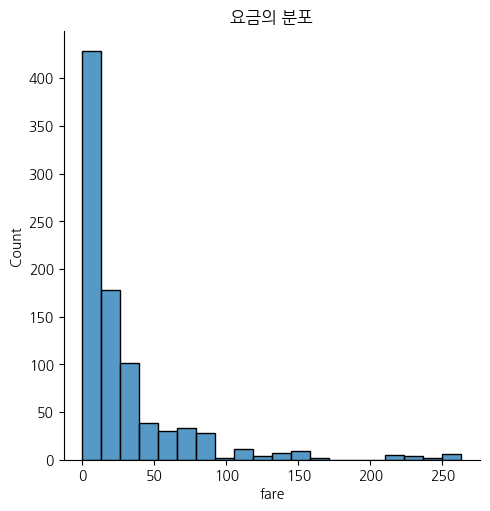

In [189]:
sns.displot(data=titan, x='fare', bins=20)
plt.title('요금의 분포')

Text(0.5, 1.0, '생존자와 비생존자의 연령 분포')

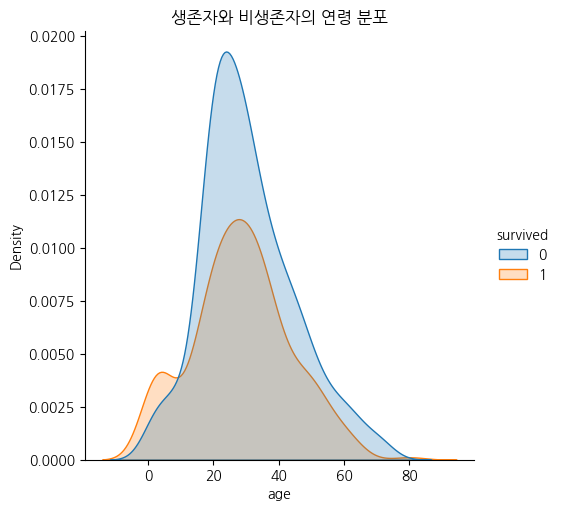

In [173]:
sns.displot(data=titan, hue='survived', kind='kde', fill=True, x='age')
# plt.legend(loc='upper right')
plt.title('생존자와 비생존자의 연령 분포')

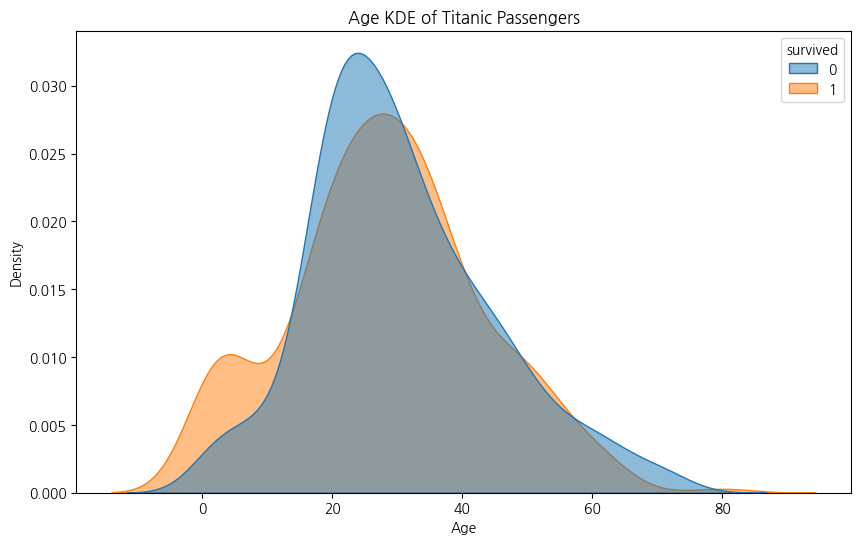

In [178]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=titan, x="age", hue="survived", fill=True, common_norm=False, alpha=0.5)
plt.title("Age KDE of Titanic Passengers")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

age 열에 대한 rugplot을 추가하여 개별 데이터 포인트의 분포를 확인합니다. KDE plot과 함께 표시합니다.

Text(0.5, 1.0, 'age 열에 대해 rugplot 추가')

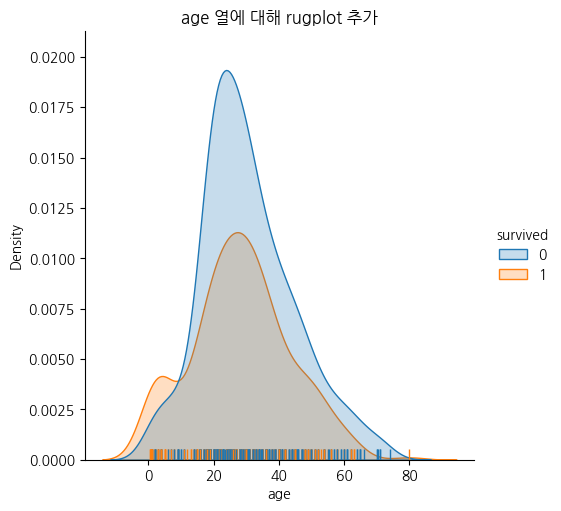

In [190]:
sns.displot(kind='kde', x='age', data=titan, rug=True, fill=True, hue='survived')
plt.title('age 열에 대해 rugplot 추가')

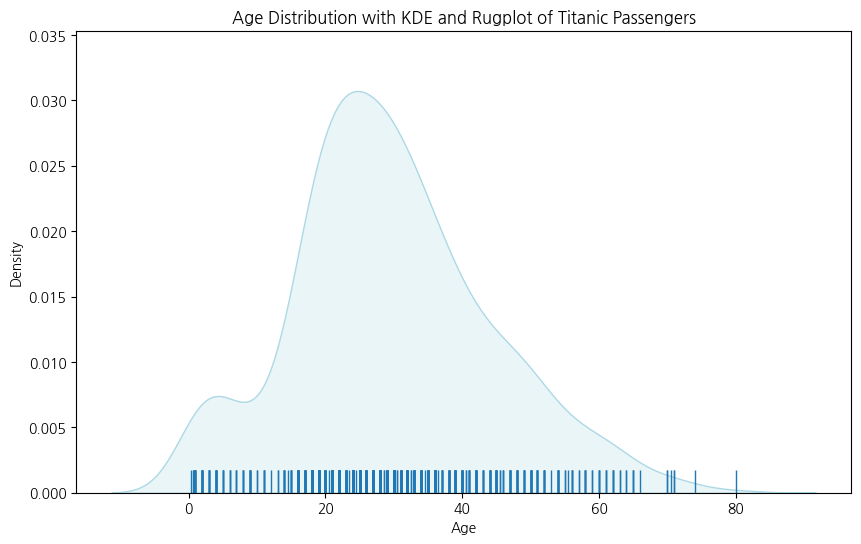

In [181]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=titan, x='age', fill=True, color='lightblue')
sns.rugplot(data=titan, x='age', height=.05)
plt.title('Age Distribution with KDE and Rugplot of Titanic Passengers')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

# [4] 범주형 데이터

## (1) bar plot

sns.catplot(kind='bar')sns.barplot()

In [192]:
titan = sns.load_dataset('titanic')
titan.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='sex'>

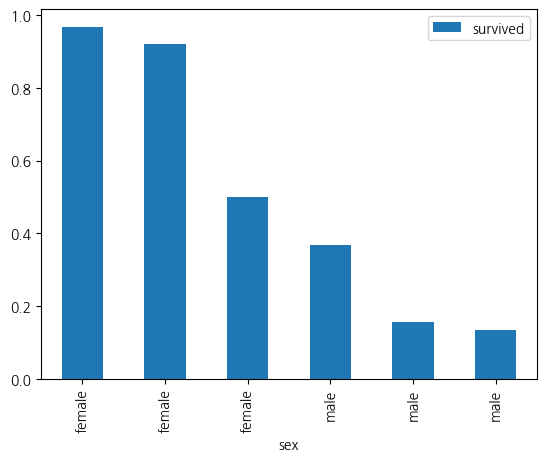

In [197]:
titan.groupby(['sex','class'],observed=False)['survived'].mean().reset_index().plot.bar(x='sex', y='survived')
# 너무 복잡함

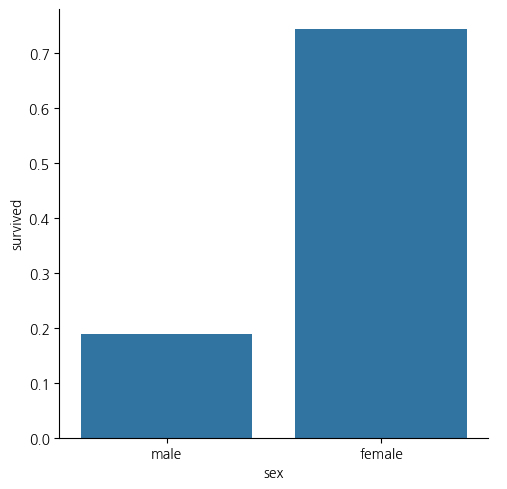

In [200]:
sns.catplot(data=titan, x='sex', y='survived', kind='bar', estimator='mean', errorbar=None)

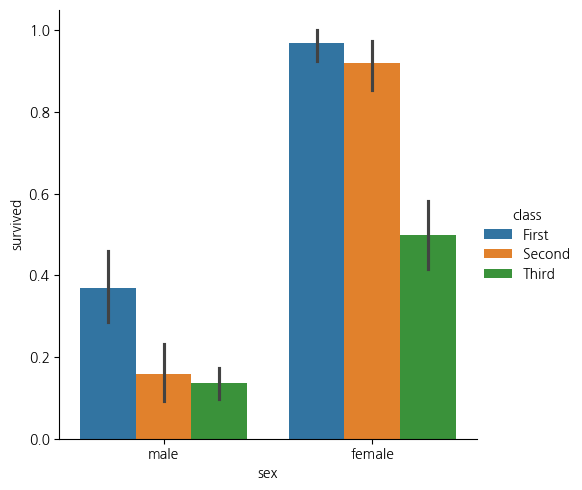

In [201]:
sns.catplot(data=titan, x="sex", y="survived", hue="class", kind="bar")

## (2) Count plot

<Axes: xlabel='count', ylabel='deck'>

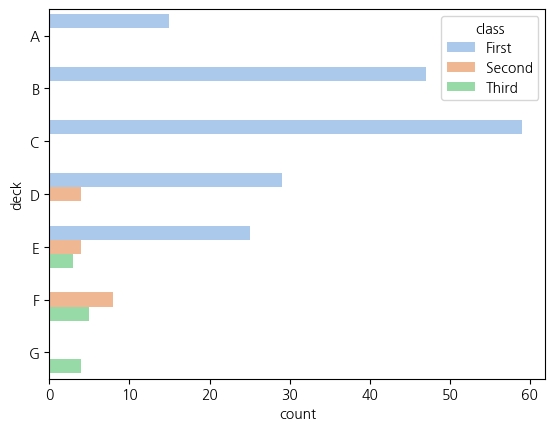

In [208]:
sns.countplot(data=titan, y='deck', hue='class', palette='pastel')

## (3) box plot

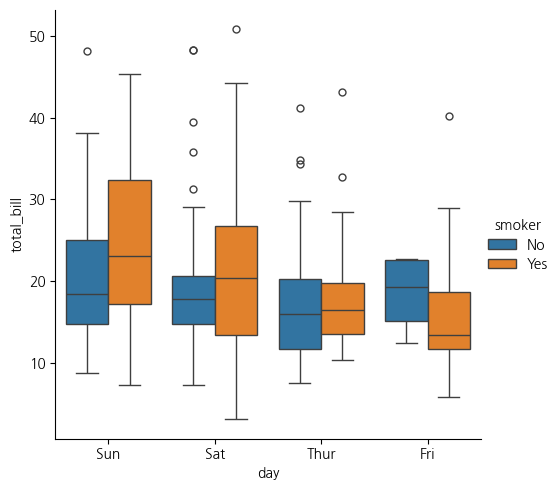

In [210]:
sns.catplot(data=tips, x="day", y="total_bill", hue="smoker", kind="box")

## (4) vilolin plot

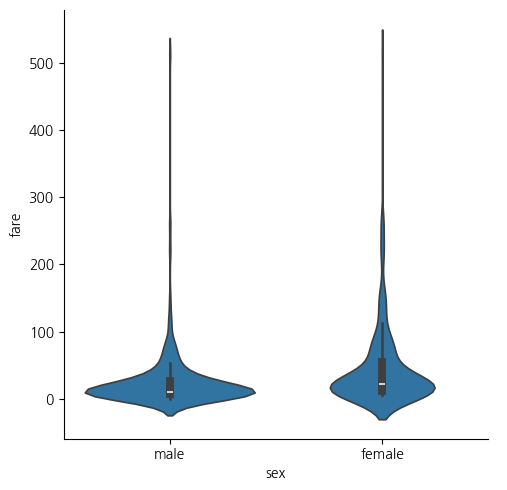

In [212]:
sns.catplot(data=titan, kind='violin', x='sex', y='fare')

## 시각화 실습(3)

승선 클래스(class)별로 survived의 평균값을 이용해
생존율을 막대그래프로 비교해 보세요.

/tmp/ipython-input-3760997635.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=titan, x='pclass', y='survived', kind='bar', estimator='mean', palette = 'pastel');


Text(0.5, 1.0, '클래스별 생존율 평균')

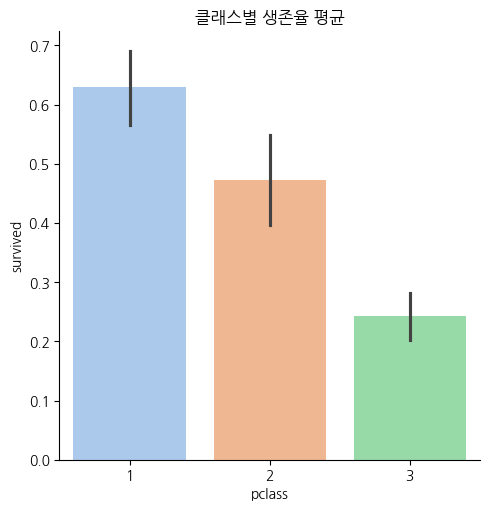

In [224]:
sns.catplot(data=titan, x='pclass', y='survived', kind='bar', estimator='mean', palette = 'pastel');
plt.title('클래스별 생존율 평균')

violinplot을 활용하여, 승선 항구(embarked)별 요금(fare)을 시각화하고, 생존(survived) 의 정보도 담을 수 있도록 파라미터를 조절해 보세요.

Text(0.5, 1.0, '승선 항구별 요금 분포')

<Figure size 1000x600 with 0 Axes>

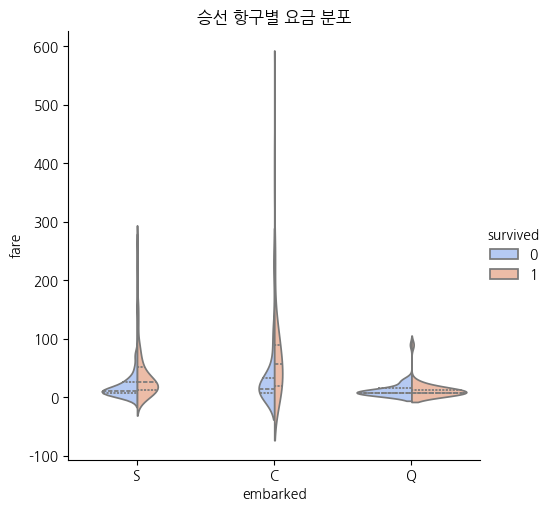

In [240]:
plt.figure(figsize=(10,6))
sns.catplot(data=titan, kind='violin', x='embarked', y='fare', hue='survived', split=True, inner='quartile',palette='coolwarm')

plt.title('승선 항구별 요금 분포')

# [5] Heatmap

In [250]:
gb = titan.groupby(['class']).agg({'survived':'mean',
                              'fare':'mean',
                              'age':'max',
                              'sex':'size'}).rename({'sex':'size'}, axis=1).round(2)

/tmp/ipython-input-1721163062.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gb = titan.groupby(['class']).agg({'survived':'mean',


<Axes: ylabel='class'>

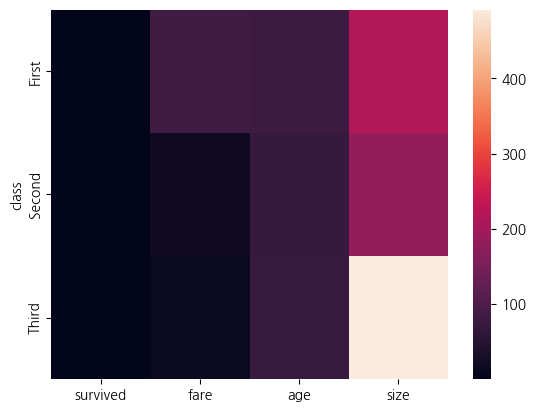

In [253]:
sns.heatmap(gb)

<Axes: >

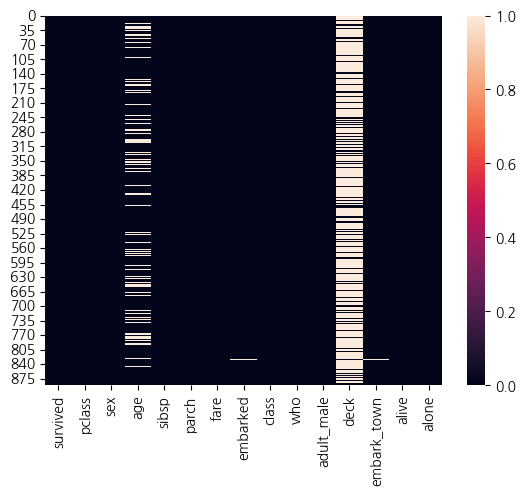

In [255]:
sns.heatmap(titan.isnull())

<Axes: >

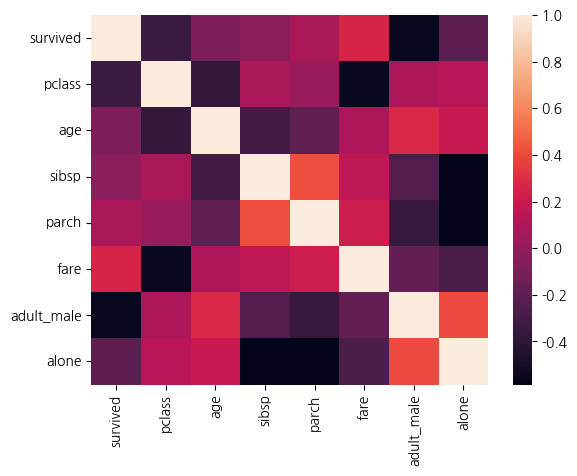

In [257]:
sns.heatmap(titan.corr(numeric_only=True))

<Axes: xlabel='survived', ylabel='sex'>

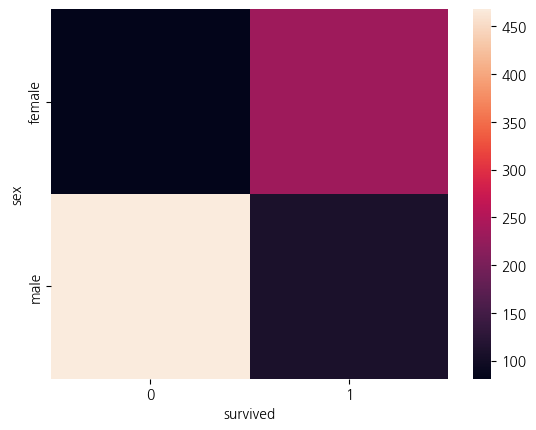

In [260]:
sns.heatmap(pd.crosstab(titan['sex'],titan['survived']))

In [262]:
titan.groupby(['sex','survived']).size().unstack()

survived,0,1
sex,,
female,81,233
male,468,109


# [6] pair plot

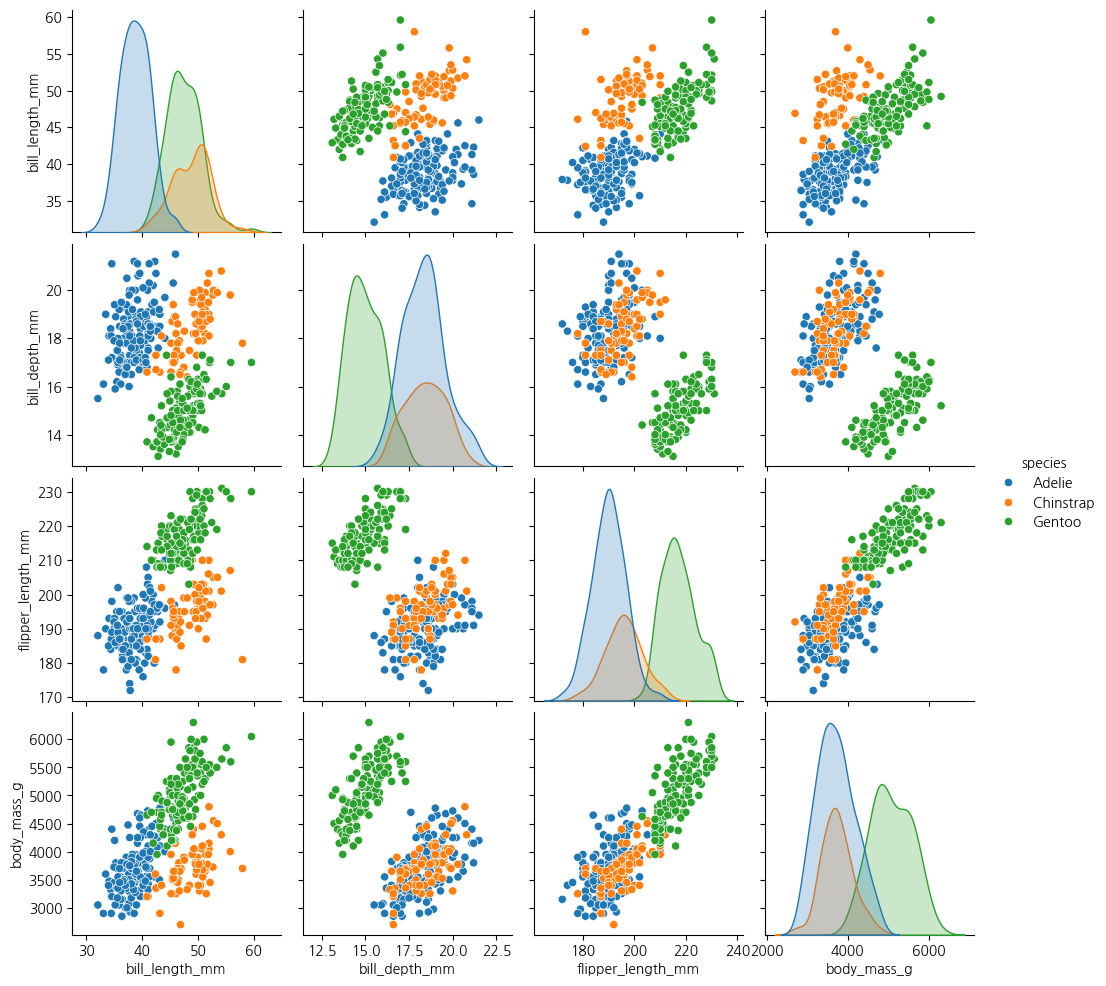

In [265]:
sns.pairplot(data=penguins, diag_kind='kde', hue='species')

# 종합 실습

In [267]:
fly = sns.load_dataset("flights")
fly.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [271]:
fly.columns

Index(['year', 'month', 'passengers'], dtype='object')

연도별 승객 수 집계해 보세요.

In [290]:
year_pass = fly.groupby('year')['passengers'].sum().reset_index()
year_pass

,year,passengers
0,1949,1520
1,1950,1676
2,1951,2042
3,1952,2364
4,1953,2700
5,1954,2867
6,1955,3408
7,1956,3939
8,1957,4421
9,1958,4572



월별 승객 수 집계해 보세요.

In [302]:
month_pass = fly.groupby('month')['passengers'].sum().reset_index()
month_pass

/tmp/ipython-input-3902849212.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  month_pass = fly.groupby('month')['passengers'].sum().reset_index()


,month,passengers
0,Jan,2901
1,Feb,2820
2,Mar,3242
3,Apr,3205
4,May,3262
5,Jun,3740
6,Jul,4216
7,Aug,4213
8,Sep,3629
9,Oct,3199


연도별 승객 수의 변화를 선 그래프로 시각화합니다.

Text(0.5, 9.444444444444438, 'Year')

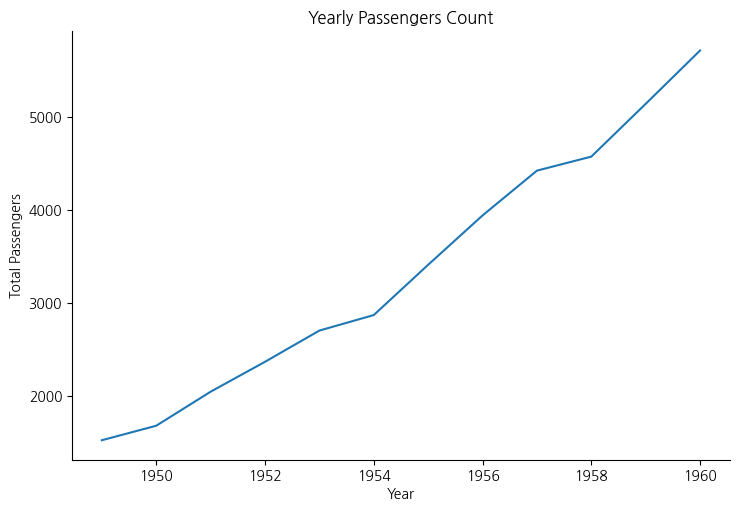

In [332]:
sns.relplot(data=year_pass, kind='line', x='year', y='passengers', errorbar=None, aspect=1.5)
# sns.relplot(data=fly, kind='line', x='year', y='passengers', errorbar=None, aspect=1.5, estimator='sum')
plt.title('Yearly Passengers Count')
plt.ylabel('Total Passengers')
plt.xlabel('Year')



월별 승객 수의 변화를 막대 그래프로 시각화합니다. 이때, 월별 데이터는 시간 순서를 고려하여 정렬합니다.

/tmp/ipython-input-3253315941.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=month_pass, x='month', y='passengers', kind='bar', height=5, aspect=2.0, palette='pastel')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Jan'),
  Text(1, 0, 'Feb'),
  Text(2, 0, 'Mar'),
  Text(3, 0, 'Apr'),
  Text(4, 0, 'May'),
  Text(5, 0, 'Jun'),
  Text(6, 0, 'Jul'),
  Text(7, 0, 'Aug'),
  Text(8, 0, 'Sep'),
  Text(9, 0, 'Oct'),
  Text(10, 0, 'Nov'),
  Text(11, 0, 'Dec')])

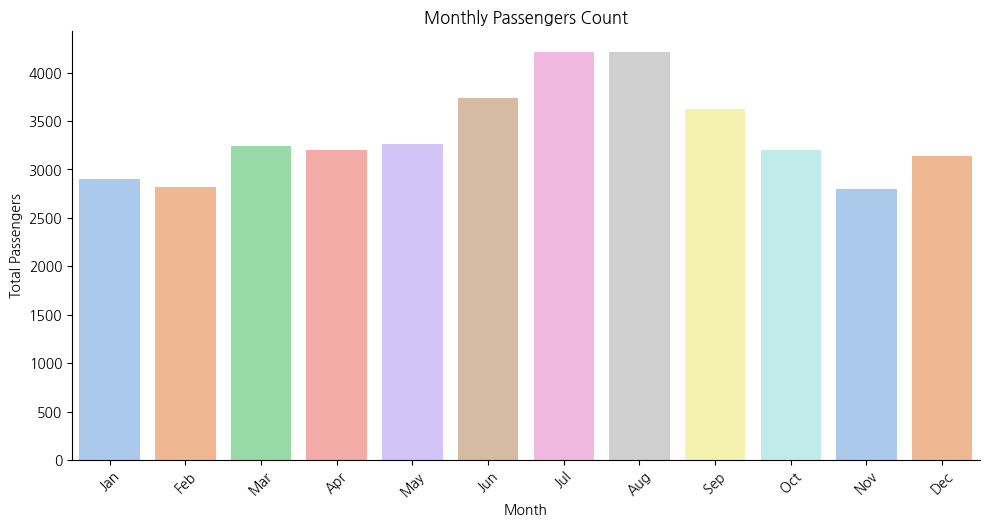

In [310]:
sns.catplot(data=month_pass, x='month', y='passengers', kind='bar', height=5, aspect=2.0, palette='pastel')
plt.title('Monthly Passengers Count')
plt.xlabel('Month')
plt.ylabel('Total Passengers')
plt.xticks(rotation=45)

In [309]:
fly.head()


,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [314]:
table = fly.pivot_table(index='month', columns='year', values='passengers', aggfunc='sum')
table

/tmp/ipython-input-1424019950.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  table = fly.pivot_table(index='month', columns='year', values='passengers', aggfunc='sum')


year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


Text(121.72222222222221, 0.5, 'Month')

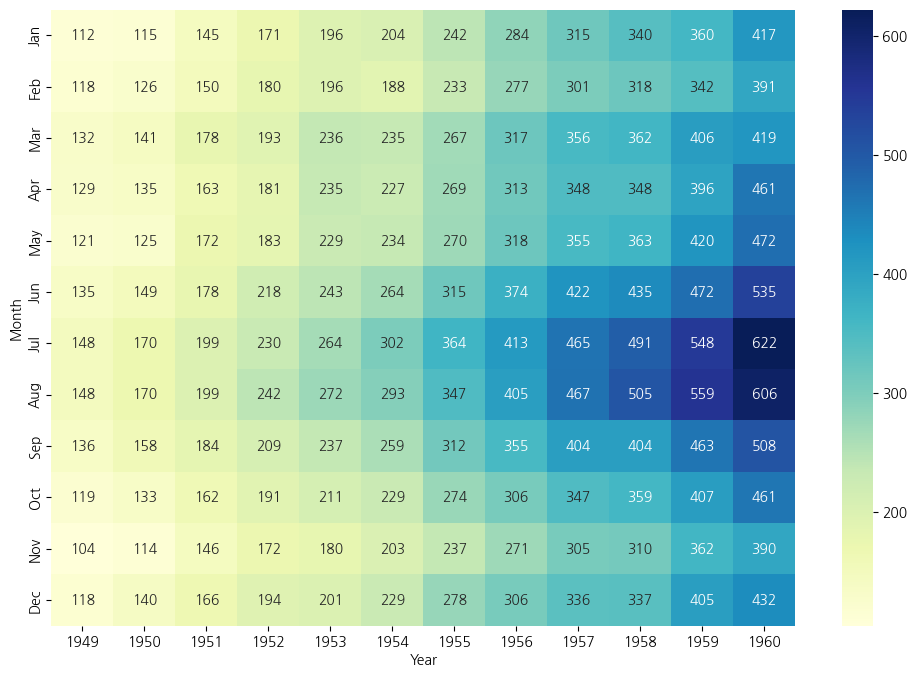

In [330]:
plt.figure(figsize=(12,8))
sns.heatmap(table, annot=True, fmt='.0f', cmap='YlGnBu', linewidths=0, linecolor='gray')

plt.xticks(rotation=0)
plt.xlabel('Year')
plt.ylabel('Month')